In [74]:
import sklearn as skl
import pandas as pd
from pylab import *
from sklearn.linear_model import LinearRegression
import scipy.stats

In [56]:
sentiment = pd.read_csv("climate-change-accountability/Bert-positivity-score.csv",names = ["companyName","sentiments"])
sentiment = sentiment.sort_values("companyName")
positives = []
for i in range(len(sentiment)):
    posVal = float("0."+sentiment["sentiments"].iloc[i].split(".")[-1][:-1])
    positives.append(posVal)
sentiment["positiveSentiment"]=positives
pledgeScore = pd.read_csv("companyName_pledgeScore.csv")
pledgeScore = pledgeScore.sort_values("companyName")

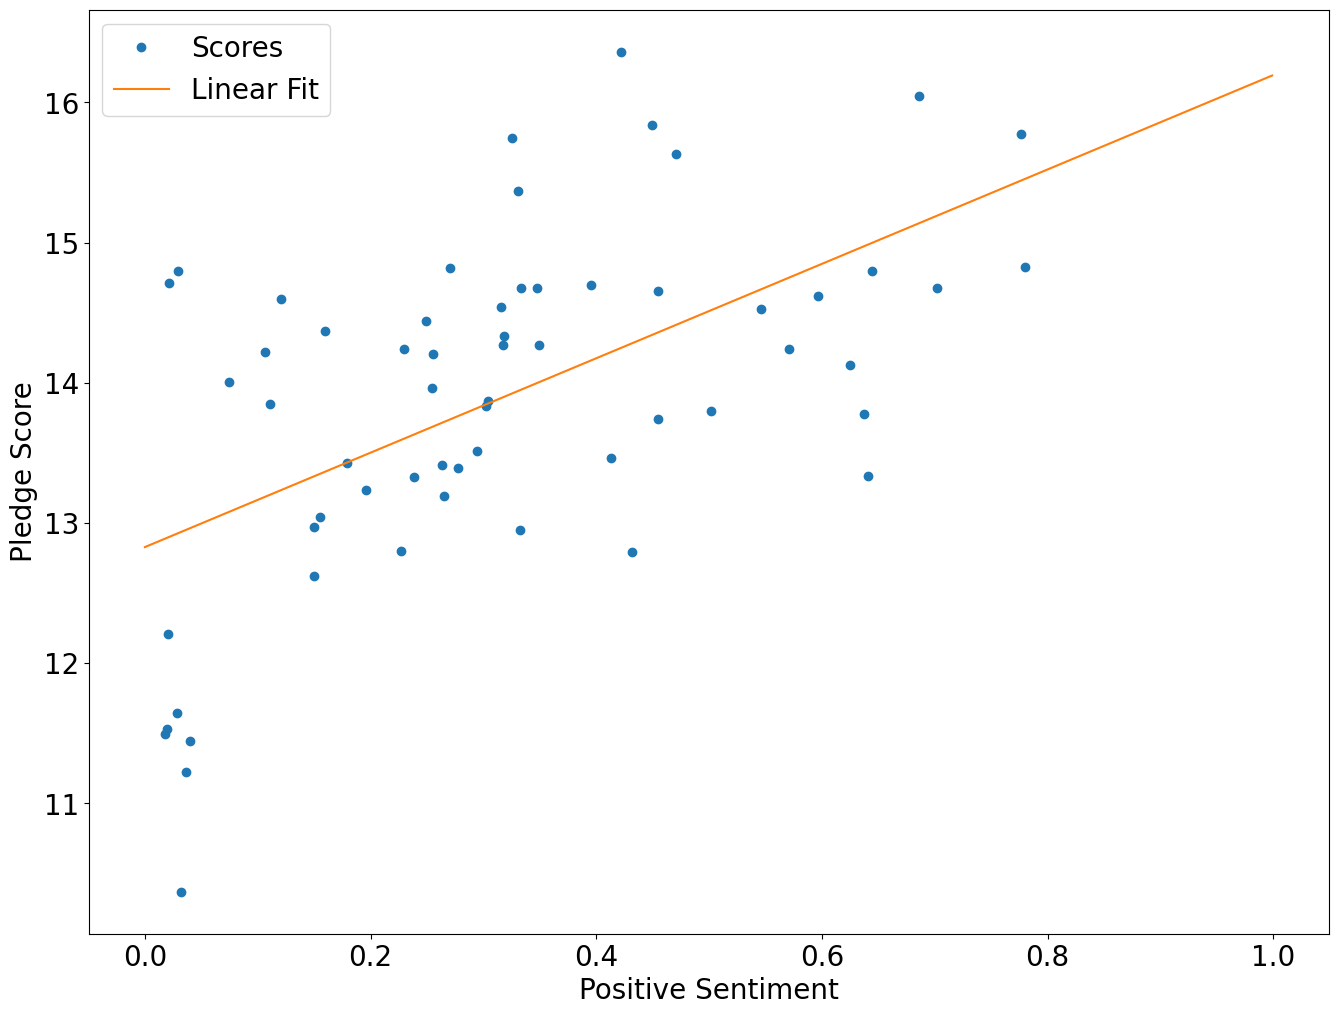

In [94]:
myFit = scipy.stats.linregress(sentiment["positiveSentiment"],pledgeScore["pledgeScore"])
m=myFit.slope
b = myFit.intercept

figure(figsize =(16,12))
plot(sentiment["positiveSentiment"],pledgeScore["pledgeScore"],"o",label = "Scores")
x=arange(0,1.0,0.001)
plot(x,m*x+b,label = "Linear Fit")

xlabel("Positive Sentiment",fontsize = 20)
ylabel("Pledge Score",fontsize = 20)

legend(fontsize = 20)

_=xticks(fontsize = 20)
_=yticks(fontsize = 20)

savefig("pledgeScore_v_PositiveSentiment")

In [ ]:
# Clearly, our two completely independent metrics are not entirely unrelated